In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import csv

from config import census_api_key
from pprint import pprint

In [2]:
# Save config information
url = 'https://api.census.gov/data/2017/pep/population?get='

# Build query URL
query_url = url + "POP,GEONAME&for=PLACE:28068&in=state:48&DATE=3,4,5,6,7,8&key=" + census_api_key
response = requests.get(query_url)
response_json = response.json()
print(response_json)

[['POP', 'GEONAME', 'DATE', 'state', 'place'], ['47795', 'Galveston city, Texas', '3', '48', '28068'], ['47567', 'Galveston city, Texas', '4', '48', '28068'], ['48125', 'Galveston city, Texas', '5', '48', '28068'], ['48711', 'Galveston city, Texas', '6', '48', '28068'], ['49322', 'Galveston city, Texas', '7', '48', '28068'], ['49765', 'Galveston city, Texas', '8', '48', '28068']]


In [3]:
# Convert to DataFrame
galveston_df = pd.DataFrame(response_json)

# String replace index
new_header = galveston_df.iloc[0]
galveston_df = galveston_df[1:]
galveston_df.columns = new_header
galveston_df

,POP,GEONAME,DATE,state,place
1,47795,"Galveston city, Texas",3,48,28068
2,47567,"Galveston city, Texas",4,48,28068
3,48125,"Galveston city, Texas",5,48,28068
4,48711,"Galveston city, Texas",6,48,28068
5,49322,"Galveston city, Texas",7,48,28068
6,49765,"Galveston city, Texas",8,48,28068


In [4]:
# Rename headers
galveston_df = galveston_df.rename(columns={'POP': 'Population',
                                            'GEONAME': 'City, State',
                                            'DATE': 'Year',
                                            'state': 'State',
                                            'place': 'City'})
galveston_df

,Population,"City, State",Year,State,City
1,47795,"Galveston city, Texas",3,48,28068
2,47567,"Galveston city, Texas",4,48,28068
3,48125,"Galveston city, Texas",5,48,28068
4,48711,"Galveston city, Texas",6,48,28068
5,49322,"Galveston city, Texas",7,48,28068
6,49765,"Galveston city, Texas",8,48,28068


In [5]:
# Replace values
galveston_df['Year'] = galveston_df['Year'].replace({'3':'2010', '4':'2011', '5':'2012', '6':'2013', '7':'2014', '8':'2015'})
galveston_df["Year"] = pd.to_numeric(galveston_df["Year"])
galveston_df["Population"] = pd.to_numeric(galveston_df["Population"])
galveston_df

,Population,"City, State",Year,State,City
1,47795,"Galveston city, Texas",2010,48,28068
2,47567,"Galveston city, Texas",2011,48,28068
3,48125,"Galveston city, Texas",2012,48,28068
4,48711,"Galveston city, Texas",2013,48,28068
5,49322,"Galveston city, Texas",2014,48,28068
6,49765,"Galveston city, Texas",2015,48,28068


In [6]:
# Remove columns
galveston_df.drop(columns=['State', 'City'])

,Population,"City, State",Year
1,47795,"Galveston city, Texas",2010
2,47567,"Galveston city, Texas",2011
3,48125,"Galveston city, Texas",2012
4,48711,"Galveston city, Texas",2013
5,49322,"Galveston city, Texas",2014
6,49765,"Galveston city, Texas",2015


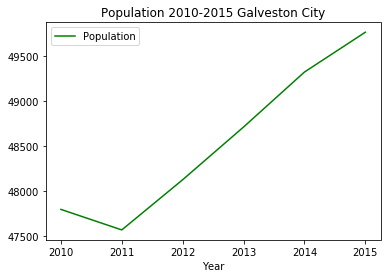

In [7]:
# Plot the graph
plot = galveston_df.plot(x='Year', y='Population', kind='line', title='Population 2010-2015 Galveston City', legend=True, color='green')

In [8]:
# Save in PNG
fig = plot.get_figure()
fig.savefig('Population_2010-2015_Galveston_City.png')